# What are Convolutional Neural Networks?


Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.

A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization.

# Project : Object_Detection

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# execute this only once... if you run again, skip this part
import zipfile
with zipfile.ZipFile("trainn.zip", 'r') as zip_ref:        # get the path for train.zip using copypath. paste the link within the quotation
     # creates new folder 'cats_dogs_images' and saves all images present in train.zip
    zip_ref.extractall("cat_dogs")  # create a new folder, rename it and get the path of it using copypath.. paste the link here
    

In [5]:
# execute this only once.. if you run again, skip this part

import os, shutil, pathlib

original_dir = pathlib.Path("cat_dogs/trainn") # get the path of train folder in cats_dogs_images using copypath and paste the link here
new_base_dir = pathlib.Path("cat_dogs/image_segregated") # create a new folder, rename it and get the path using copypath and paste the link here.


# define a function to create subsets for train, test and validation
def make_subset(subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)   
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# calling the function thrice to create 3 subsets. 
make_subset("train", start_index=0, end_index=300)
make_subset("validation", start_index=300, end_index=400)
make_subset("test", start_index=400, end_index=500)

In [6]:
# here we use Functional API to create a model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [8]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 600 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # path to save the model file
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - 29s 1s/step - loss: 0.8059 - accuracy: 0.4950 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/10
19/19 [==============================] - 27s 1s/step - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/10
19/19 [==============================] - 28s 1s/step - loss: 0.6925 - accuracy: 0.5450 - val_loss: 0.6738 - val_accuracy: 0.5600
Epoch 4/10
19/19 [==============================] - 29s 2s/step - loss: 0.7004 - accuracy: 0.5250 - val_loss: 0.6901 - val_accuracy: 0.6200
Epoch 5/10
19/19 [==============================] - 28s 1s/step - loss: 0.7149 - accuracy: 0.5567 - val_loss: 0.6757 - val_accuracy: 0.6300
Epoch 6/10
19/19 [==============================] - 28s 1s/step - loss: 0.6759 - accuracy: 0.6083 - val_loss: 0.6519 - val_accuracy: 0.6150
Epoch 7/10
19/19 [==============================] - 29s 2s/step - loss: 0.6234 - accuracy: 0.6533 - val_loss: 0.6875 - val_accuracy: 0.5300
Epoch 8/10
19/19 [==

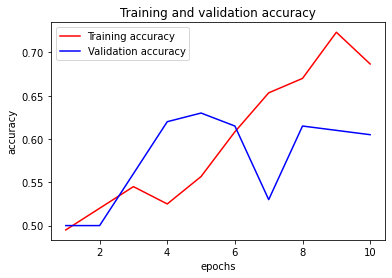

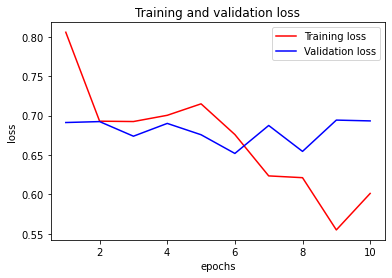

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [12]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 3s 360ms/step - loss: 0.6529 - accuracy: 0.6550
Test accuracy: 0.655


In [13]:
import tensorflow
img = keras.preprocessing.image.load_img(
    "cat_dog/image_segregated/test/dog/dog.415.jpg", target_size=(180,180,3)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

1/1 [==============================] - 0s 163ms/step
This image is 15.80 percent cat and 84.20 percent dog.


In [14]:
score


array([0.8419783], dtype=float32)